# Load Italy dataset

In [2]:
import pandas as pd
import pickle
from data_structure import OD_tree, GeoSpine

file_path = '../data/Italy'
df = pd.read_csv(file_path + '/data.csv')

with open(file_path + '/structure/geo_spine.pickle', 'rb') as f:
    spine = pickle.load(f)
spine = GeoSpine(spine)
tree = OD_tree(df, spine)

# Histogram and sparsity

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

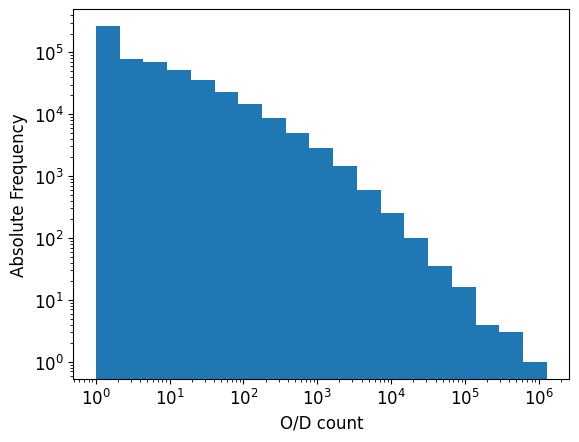

In [4]:
tree_level = tree.depth
geo_level = int(tree_level / 2)
data = tree.get_data_at_level(tree_level)
# plot histogram
x_values = data["COUNT"].values
log_bins = np.logspace(np.log10(x_values.min()), np.log10(x_values.max()), num=20)

# Crea l'istogramma con scala logaritmica
plt.hist(x_values, bins=log_bins, density=False)

# Imposta la scala logaritmica per l'asse x
plt.xscale('log')
plt.yscale('log')
plt.xlabel("O/D count", fontsize=12)
plt.ylabel("Absolute Frequency", fontsize=12)
# change size of the ticks of the axes
plt.tick_params(axis='both', which='major', labelsize=12)

# save the plot
folder = "../plots/Italy/additional"
if not os.path.exists(folder):
    os.makedirs(folder)
plt.savefig(f"{folder}/histogram_OD_{geo_level}.png")
plt.show()

In [5]:
# compute total number of O/D pairs
number_OD = len(spine.get_nodes(geo_level))
print("Number of areas at geo level {}: {}".format(geo_level, len(spine.get_nodes(geo_level))))
print(f"Total number of O/D pairs at geo level {geo_level}: {number_OD**2}")
print(f"Number of O/D pairs with data: {len(data)}")
print("Sparsity: {:.2f}%".format(100-100 * len(data) / (number_OD**2)))

Number of areas at geo level 3: 8092
Total number of O/D pairs at geo level 3: 65480464
Number of O/D pairs with data: 556120
Sparsity: 99.15%


# Sparsity at different level

100%|██████████| 6/6 [00:30<00:00,  5.14s/it]


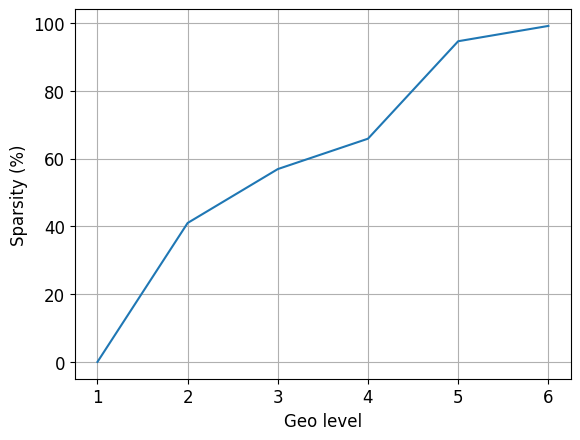

In [10]:
import tqdm as tqdm

sparsity = []
for geo_level in tqdm.tqdm(range(1, tree_level+1)):
    df: pd.Series = tree.full_query_level(geo_level)
    # count number of rows with value greater than 0
    count = len(df[df > 0])
    sparsity.append(100 - 100 * count / len(df))
# plot sparsity
plt.plot(range(1, tree_level+1), sparsity)
plt.xlabel("Geo level", fontsize=12)
plt.ylabel("Sparsity (%)", fontsize=12)
plt.xticks(range(1, tree_level+1))
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

# Distribution of O/D pairs at each level

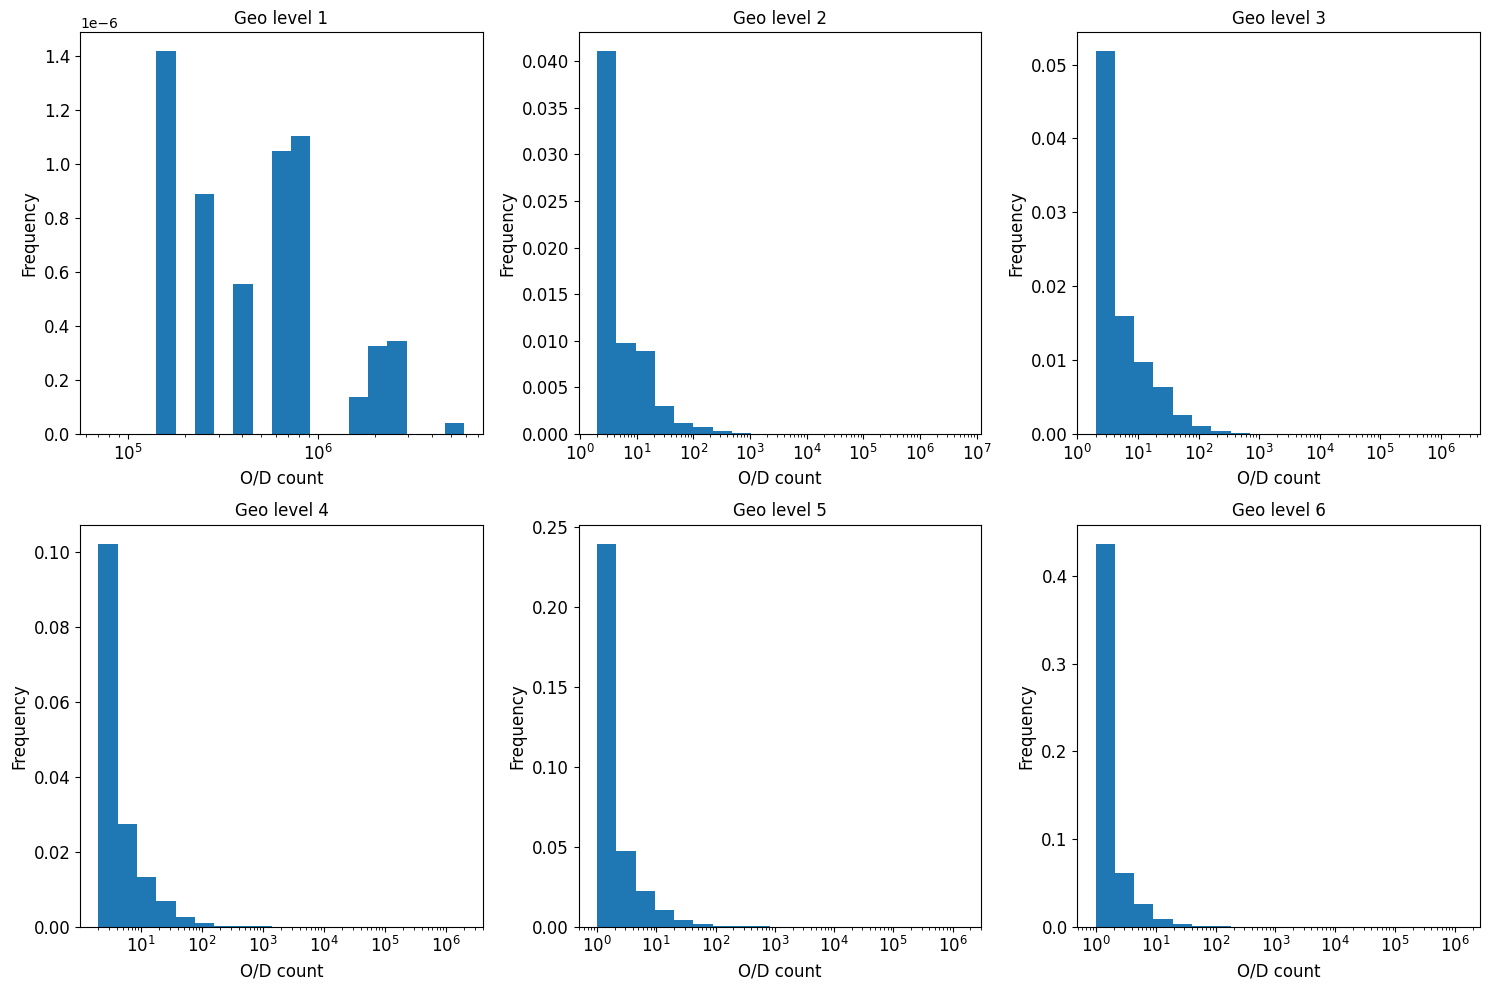

In [16]:
# plot a histogram of the number of O/D pairs at each level, create 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
for i, geo_level in enumerate(range(1, tree_level+1)):
    df: pd.Series = tree.stable_query_level(geo_level)
    # plot histogram
    x_values = df.values
    log_bins = np.logspace(np.log10(x_values.min()), np.log10(x_values.max()), num=20)
    axs[i].hist(x_values, bins=log_bins, density=True)
    axs[i].set_xscale('log')
    # axs[i].set_yscale('log')
    axs[i].set_xlabel("O/D count", fontsize=12)
    axs[i].set_ylabel("Frequency", fontsize=12)
    axs[i].set_title(f"Geo level {geo_level}", fontsize=12)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

# Number of O/D pairs with value smaller or equal to 2

In [8]:
for geo_level in range(1, tree_level+1):
    df: pd.Series = tree.stable_query_level(geo_level)
    count = len(df[df <= 2])
    fraction = count / len(df) * 100
    print(f"Geo level {geo_level}: {fraction} % O/D pairs with value equal to 1")

Geo level 1: 0.0 % O/D pairs with value equal to 1
Geo level 2: 8.050847457627118 % O/D pairs with value equal to 1
Geo level 3: 7.067510548523207 % O/D pairs with value equal to 1
Geo level 4: 13.199321869702107 % O/D pairs with value equal to 1
Geo level 5: 26.661781639275624 % O/D pairs with value equal to 1
Geo level 6: 47.90081277422139 % O/D pairs with value equal to 1
